In [15]:
from pathlib import Path
from eval import parse_retrieval, max_recall, average_precision_score, precision_recall_curve
from matplotlib import pyplot as plt
import numpy as np

In [19]:
def plot_pr_curves(recall: list, precision: list, method = 'test', color='green'):
        r_precision, r_recall = max_recall(precision, recall)
        plt.plot(recall, precision, label="{} (MR={:.1f})".format(f'{method}', r_recall*100), color=color)
        plt.ylim(np.min(precision), 1.00)
        plt.xlim(0.0, None)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()
        # legend position
        plt.legend(loc='center left', bbox_to_anchor=(0, 0.3))

def plot(scores, labels, methods, exp_name):
    """
    Plot the precision-recall curves.
    """
    plt.figure(figsize=(6.8, 5))
    plt.rcParams['text.usetex'] = True
    # font times new roman
    # font bold
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.family'] = 'Arial'
    
    colors = ['b', 'c']

    for score, method, c in zip(scores, methods, colors):
        average_precision = average_precision_score(labels, score)
        precision, recall, TH = precision_recall_curve(labels, score)
        precision_r, recall_max = max_recall(precision, recall)
        plot_pr_curves(recall, precision, method, c)
        print(f"Average Precision: {average_precision} \n")
        print(f"Max Recall @ 100% Precision: {recall_max} \n")
        
    plt.title("Precision-Recall Curves for {}".format(exp_name))

Average Precision: 0.99610037073966 

Max Recall @ 100% Precision: 0.2916666666666667 

Average Precision: 0.9979614260168441 

Max Recall @ 100% Precision: 0.8981481481481481 



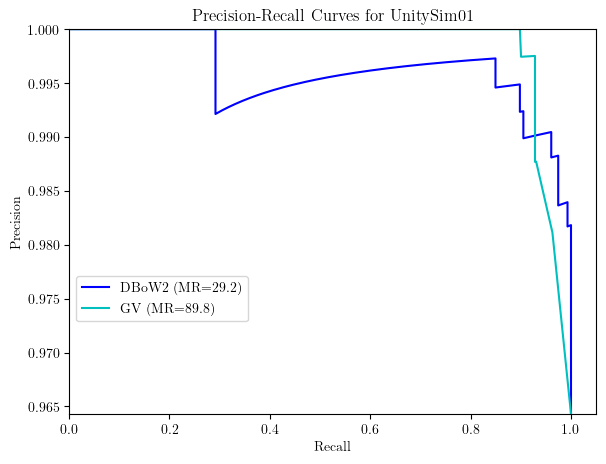

In [20]:
results = Path("data/repetitive_mono/repetitive/DBow2loop_gt.txt")
dbow, gv, labels = parse_retrieval(results)
scores = [dbow, gv]
methods = ["DBoW2", "GV"]
exp_name = "UnitySim01"
plot(scores, labels, methods, exp_name)
plt.savefig("data/repetitive_mono/repetitive/PR_curves.png", bbox_inches='tight', dpi = 300)